In [152]:
import datetime
import numpy as np
import pandas as pd
import re
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [153]:
time_columns = ['SH_CDATE', 'GAS_ACQ_DATE', 'D_G_ACQ_DATE']
year_columns = ['WH_SPUD_YEAR']

In [154]:
oil = pd.read_csv('./aramco/data/CNS oil.csv')
rocks = pd.read_csv('./aramco/data/CNS rock samples.csv')
gas_train = pd.read_csv('./aramco/data/CNS_gas_train.csv', skiprows=[1],
                        parse_dates=time_columns)
gas_test = pd.read_csv('./aramco/data/CNS_gas_test.csv', skiprows=[1])

/home/semen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## production

In [155]:
production = pd.read_csv('./aramco/data/CNS_Field_Production.csv',
                   parse_dates=['PERIODDATE'], dtype={'PERIODYR': int})
production['FIELDNAME'] = production['FIELDNAME'].str.lower()

In [156]:
production.isnull().mean()

X             0.000000
Y             0.000000
OBJECTID      0.000000
FIELDNAME     0.000000
FIELDAREA     0.000000
ORGGRPNM      0.000000
UNITNAME      0.000000
UNITTYPCOD    0.000000
UNITTYPDES    0.000000
LOCATION      0.000000
PERIODDATE    0.000000
PERIODYRMN    0.000000
PERIODMNTH    0.000000
PERIODMNNM    0.000000
PERIODYR      0.000000
OILPRODMAS    0.021631
OILPRODM3     0.021631
OILPRDDENS    0.021631
OILPRODMBD    0.021631
DGASPRODMA    0.991593
DGASPROKSM    0.991593
DGASPROMMS    0.991593
DGASPRODEN    0.991593
AGASPRODMA    0.021631
AGASPROMMS    0.021631
AGASPROKSM    0.021631
AGASPRODEN    0.021631
GCONDMASS     0.991593
GCONDVOL      0.991593
GCONDMBD      0.991593
GCONDDEN      0.991593
INJWATMASS    0.021631
INJWATVOL     0.021631
INJWATMBD     0.021631
WATPRODMAS    0.013223
WATPRODVOL    0.013223
WATPRODMBD    0.013223
WELLREGNO     0.000000
dtype: float64

In [157]:
prod_cols = ['OILPRODMAS', 'OILPRODM3', 'OILPRDDENS', 'OILPRODMBD', 'AGASPRODMA',
             'AGASPROMMS', 'AGASPROKSM', 'AGASPRODEN', 'INJWATMASS', 'INJWATVOL',
             'INJWATMBD', 'WATPRODMAS', 'WATPRODVOL', 'WATPRODMBD', 'WELLREGNO']

In [158]:
production = production.rename(columns={
    'PERIODYR': 'year', 'PERIODMNTH': 'month', 'FIELDNAME': 'FIELD_NAME'})

In [159]:
fields_geo = production.groupby('FIELD_NAME')[['X', 'Y']].first()

In [160]:
prod_vol = production.groupby(['FIELD_NAME', 'year', 'month'])[prod_cols].mean()

In [161]:
for ds in datasets:
    ds['FIELD_NAME'] = ds['WH_FIELD'].astype(str).str.lower()

In [162]:
gas_train.head(2)

,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,WH_OPERATOR,WH_SPUD_DATE,WH_SPUD_YEAR,WH_COMP_DATE,WH_TD_M,WH_DR_ELEV_M,WH_DEPTH_REF,WH_WATER_DEPTH_M,SAMPLE_ID,SH_DEPTH_TOP_FT,SH_DEPTH_BOT_FT,SH_SAMPLE_TYPE,SH_SAMPLE_SUB_TYPE,SH_ORIG,SH_ORIG_DESC,SH_TREATMENT,SH_TREATMENT_DESC,SH_LITH,SH_AGE,SH_AGE_BOT,SH_FORM,SH_FORM_BOT,SH_CDATE,SH_COMMENT,SAMPLE_ID_GM,SAMPLE_ID_GDB,SAMPLE_ID_SAM,EXT_SAMPLE_VENDOR,SAMPLE_ID_EXT,GAS_METHOD,GAS_LAB,GAS_ACQ_DATE,GAS_TOTAL_CONCENTRATION,GAS_AIR,GAS_C1,GAS_C2,C2_UNSAT,GAS_C3,C3_UNSAT,GAS_IC4,GAS_NC4,C4_UNSAT,GAS_NEOC5,GAS_IC5,GAS_NC5,C5_UNSAT,GAS_NC5_PLUS,GAS_C6PLUS,GAS_O2,GAS_CO2,GAS_H2,GAS_H2S,GAS_HE,GAS_N2,D_G_METHOD,D_G_LAB,D_G_DATA_TYPE,D_G_ACQ_DATE,CSIA_CONC_C1,CSIA_NC1,CSIA_NC2,CSIA_NC3,CSIA_IC4,CSIA_NC4,CSIA_NEOC5,CSIA_IC5,CSIA_NC5,CSIA_ETHENE,CSIA_PROPENE,DC_G_CO2,DO_G_CO2,DS_G_H2S,DD_G_H2,DN_G_N2,DD_G_GAS,DD_G_NC1,DD_G_NC2,DD_G_NC3,DD_G_IC4,DD_G_NC4,DD_G_IC5,DD_G_NC5
0,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXPRO_41219,9814.0,12360.0,Gas,Subsurface,SEPR,NaN,ASIS,NaN,NaN,NaN,NaN,SELE,NaN,2016-03-30,1379-C1-F,NaN,NaN,NaN,NaN,NaN,Air corrected,ISOLAB,2016-05-23,NaN,0.069,75.5,11.4,0.0019,6.1,0.0008,1.0,2.1,NaN,0.0085,0.51,0.53,NaN,NaN,0.50,NaN,1.8,0.0,0.0,NaN,0.56,CSIA,ISOLAB,per mil,2016-05-23,NaN,-42.1,-28.8,-28.2,-29.0,-28.5,NaN,-28.2,-28.7,NaN,NaN,-7.7,NaN,NaN,NaN,-4.0,NaN,-187.0,NaN,NaN,NaN,NaN,NaN,NaN
1,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXPRO_41220,9814.0,12360.0,Gas,Subsurface,SEPR,NaN,ASIS,NaN,NaN,NaN,NaN,SELE,NaN,2016-03-30,A2442,NaN,NaN,NaN,NaN,NaN,Air corrected,ISOLAB,2016-05-23,NaN,0.021,75.4,11.2,0.0017,6.1,0.0007,1.1,2.2,NaN,0.0087,0.54,0.57,NaN,NaN,0.58,NaN,1.8,0.0,0.0,NaN,0.57,CSIA,ISOLAB,per mil,2016-05-23,NaN,-42.1,-28.8,-28.2,-29.0,-28.5,NaN,-28.2,-28.7,NaN,NaN,-7.6,NaN,NaN,NaN,-3.7,NaN,-187.0,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
gas_train = gas_train.loc[~(gas_train['WH_LONG'] == 'World Geodetic System 1984')]

In [164]:
gas_train['WH_LONG'] = gas_train['WH_LONG'].astype(float)

In [165]:
gas_train['year'] = gas_train['SH_CDATE'].apply(
    lambda x: int(x.year) if (x.year is not np.nan) else x)
gas_train['month'] = gas_train['SH_CDATE'].apply(
    lambda x: int(x.month) if (x.month is not np.nan) else x)

In [166]:
gas = gas_train[['WELL_NAME', 'WH_LAT', 'WH_LONG', 'year', 'month'] + target_cols]

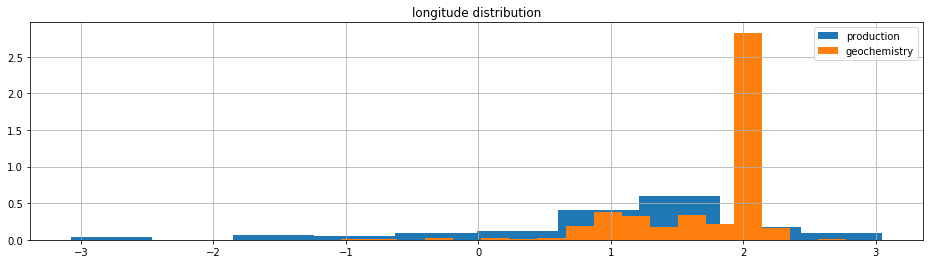

In [167]:
plt.figure(figsize=(16, 4))
plt.title('longitude distribution')
production['X'].hist(density=True)
gas['WH_LONG'].hist(density=True, bins=20)
plt.legend(['production', 'geochemistry']);

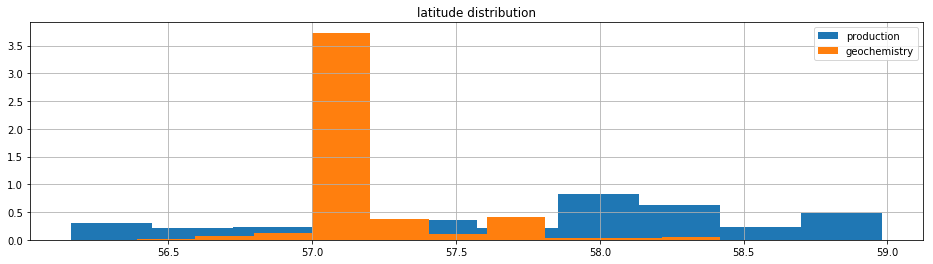

In [168]:
plt.figure(figsize=(16, 4))
plt.title('latitude distribution')
production['Y'].hist(density=True)
gas['WH_LAT'].hist(density=True)
plt.legend(['production', 'geochemistry']);

In [169]:
gas = gas.sort_values('WH_LONG')
production = production.sort_values('X')

In [170]:
production = production.drop_duplicates()
gas = gas.drop_duplicates()
# gas = gas[~gas['WH_LAT'].isnull()]
# gas = gas[~gas['year'].isnull()]
gas['year'] = gas['year'].astype(int32)
gas['month'] = gas['month'].astype(int64)
gas = gas.rename(columns={'WH_LAT': 'Y', 'WH_LONG': 'X'})
gas = gas[gas['X'] > 0]

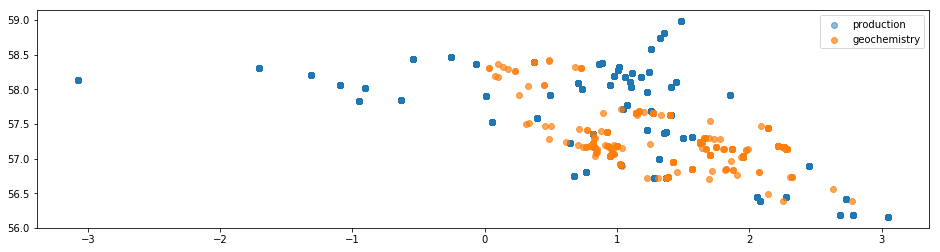

In [171]:
plt.figure(figsize=(16, 4))
plt.scatter(production['X'], production['Y'], alpha=0.5)
plt.scatter(gas['X'], gas['Y'], alpha=0.7)
plt.legend(['production', 'geochemistry']);

In [172]:
grid_x = np.linspace(gas['X'].min() - 0.2, gas['X'].max() + 0.2, 5)
grid_y = np.linspace(gas['Y'].min() - 0.2, gas['Y'].max() + 0.2, 5)

In [173]:
production['X'] = production['X'].apply(lambda x: grid_x[np.abs(x - grid_x).argmin()])
production['Y'] = production['Y'].apply(lambda x: grid_y[np.abs(x - grid_y).argmin()])
gas['X'] = gas['X'].apply(lambda x: grid_x[np.abs(x - grid_x).argmin()])
gas['Y'] = gas['Y'].apply(lambda x: grid_y[np.abs(x - grid_y).argmin()])

In [174]:
production_grouped = production.groupby(by=['X', 'Y', 'year', 'month']).mean()

In [175]:
gas_grouped = gas.groupby(by=['X', 'Y', 'year', 'month']).mean()

In [176]:
(~production_grouped.join(gas_grouped)['GAS_C1'].isnull()).sum()

119

In [177]:
all_df = production_grouped.join(gas_grouped)

In [178]:
all_df.head(2)

OBJECTID  PERIODYRMN  OILPRODMAS  OILPRODM3  \
X         Y         year month                                                
-0.165828 57.405076 1997 8       11558.0    199708.0   6151.7220     7355.0   
                         9       11559.0    199709.0  35643.7548    42162.0   

                                OILPRDDENS  OILPRODMBD  DGASPRODMA  \
X         Y         year month                                       
-0.165828 57.405076 1997 8             0.0    1.492353         NaN   
                         9             0.0    8.839966         NaN   

                                DGASPROKSM  DGASPROMMS  DGASPRODEN  \
X         Y         year month                                       
-0.165828 57.405076 1997 8             NaN         NaN         NaN   
                         9             NaN         NaN         NaN   

                                AGASPRODMA  AGASPROMMS  AGASPROKSM  \
X         Y         year month                                       
-0.165828 57.405076 1997 8           27.60    0.052403        46.0   
                         9          216.32    0.301355       256.0   

                                AGASPRODEN  GCONDMASS  GCONDVOL  GCONDMBD  \
X         Y         year month                                              
-0.165828 57.405076 1997 8           0.600        NaN       NaN       NaN   
                         9           0.845        NaN       NaN       NaN   

                                GCONDDEN  INJWATMASS  INJWATVOL  INJWATMBD  \
X         Y         year month                                               
-0.165828 57.405076 1997 8           NaN         0.0        0.0        0.0   
                         9           NaN         0.0        0.0        0.0   

                                WATPRODMAS  WATPRODVOL  WATPRODMBD  GAS_C1  \
X         Y         year month                                               
-0.165828 57.405076 1997 8            51.0        51.0    0.010348     NaN   
                         9            43.0        43.0    0.009016     NaN   

                                GAS_C2  GAS_C3  GAS_IC4  GAS_NC4  GAS_IC5  \
X         Y         year month                                              
-0.165828 57.405076 1997 8         NaN     NaN      NaN      NaN      NaN   
                         9         NaN     NaN      NaN      NaN      NaN   

                                GAS_NC5  
X         Y         year month           
-0.165828 57.405076 1997 8          NaN  
                         9          NaN

In [179]:
all_df.drop(columns=target_cols).columns

Index(['OBJECTID', 'PERIODYRMN', 'OILPRODMAS', 'OILPRODM3', 'OILPRDDENS',
       'OILPRODMBD', 'DGASPRODMA', 'DGASPROKSM', 'DGASPROMMS', 'DGASPRODEN',
       'AGASPRODMA', 'AGASPROMMS', 'AGASPROKSM', 'AGASPRODEN', 'GCONDMASS',
       'GCONDVOL', 'GCONDMBD', 'GCONDDEN', 'INJWATMASS', 'INJWATVOL',
       'INJWATMBD', 'WATPRODMAS', 'WATPRODVOL', 'WATPRODMBD'],
      dtype='object')

In [180]:
all_df[all_df.drop(columns=target_cols).columns] = all_df[
    all_df.drop(columns=target_cols).columns].fillna('NAN')

In [181]:
all_df = all_df.dropna()

In [182]:
all_df = all_df.replace('NAN', np.nan)

In [183]:
all_df

OBJECTID  PERIODYRMN     OILPRODMAS  \
X        Y         year month                                            
0.620133 57.405076 2008 10     10102.000000    200810.0   10880.769050   
                   2011 10     10138.000000    201110.0   11970.400000   
                   2012 1      10141.000000    201201.0   12779.752300   
                        5      10145.000000    201205.0   13110.234050   
                        6      10146.000000    201206.0    2907.544900   
                        7      10147.000000    201207.0   13653.899500   
                        8      10148.000000    201208.0     566.596950   
                        9      10149.000000    201209.0     224.640000   
                        10     10150.000000    201210.0    5914.096000   
                        11     10151.000000    201211.0   14973.927750   
                        12     10152.000000    201212.0   13839.384300   
                   2013 2      10154.000000    201302.0   13727.620900   
                        12     10164.000000    201312.0    6848.205600   
                   2014 1      10165.000000    201401.0    1857.595600   
                        3      10167.000000    201403.0   12017.106550   
                        6      10170.000000    201406.0    9752.288000   
                        7      10171.000000    201407.0    9000.992000   
                        11     10175.000000    201411.0   13358.060750   
1.406095 56.797698 1999 10      6992.500000    199910.0  109564.989300   
                   2002 11      6201.333333    200211.0   81235.462400   
                   2007 4       6254.333333    200704.0   43826.044267   
                        5       6255.333333    200705.0   48173.679967   
                        6       6256.333333    200706.0   50364.605400   
                        7       6257.333333    200707.0   51159.752467   
                        8       6258.333333    200708.0   47641.850667   
                        11      6261.333333    200711.0   25115.390933   
                        12      6262.333333    200712.0   34482.942800   
                   2009 2       7497.500000    200902.0   22255.566625   
                   2013 11      7554.500000    201311.0     393.679050   
                   2014 1       7556.500000    201401.0    5526.070450   
         57.405076 2009 2       4543.750000    200902.0   12031.877525   
                        3       4544.750000    200903.0    7049.223450   
                        6       4547.750000    200906.0    9071.168275   
                        7       4548.750000    200907.0   10893.744050   
                        8       4549.750000    200908.0    2619.777275   
                        9       4550.750000    200909.0       0.000000   
                        10      4551.750000    200910.0    8986.409750   
                        11      4552.750000    200911.0   10369.309400   
                   2010 11      4312.000000    201011.0    6081.838920   
                   2011 11      4324.000000    201111.0    4157.220500   
                   2013 1       4338.000000    201301.0    3183.325200   
                        2       4339.000000    201302.0    4672.909600   
                        3       4340.000000    201303.0    5062.416400   
                        4       4341.000000    201304.0    5392.459600   
                        5       4342.000000    201305.0    4105.009400   
                        6       4343.000000    201306.0     317.970400   
                        7       4344.000000    201307.0    1161.636200   
                        8       4345.000000    201308.0     260.317200   
                        9       4346.000000    201309.0     380.138000   
                        10      4347.000000    201310.0     498.656400   
                        12      4349.000000    201312.0     156.776400   
                   2014 1       4350.000000    201401.0     701.342400   
                        10      4359.00

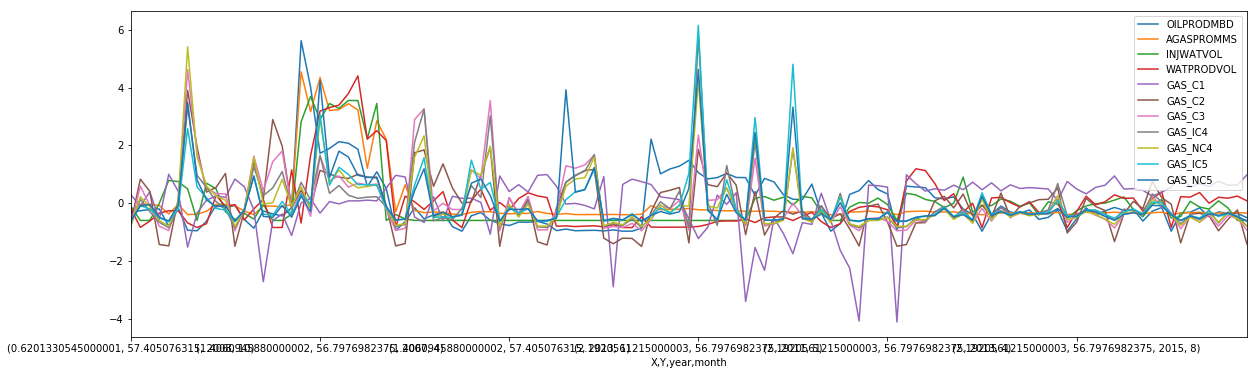

In [184]:
plt.figure(figsize=(20, 6))
cols = all_df[['OILPRODMBD', 'AGASPROMMS', 'INJWATVOL', 'WATPRODVOL'] + target_cols].columns
for tag in cols:
    ((all_df[tag] - all_df[tag].mean()) / all_df[tag].std()).plot()
plt.legend(cols);

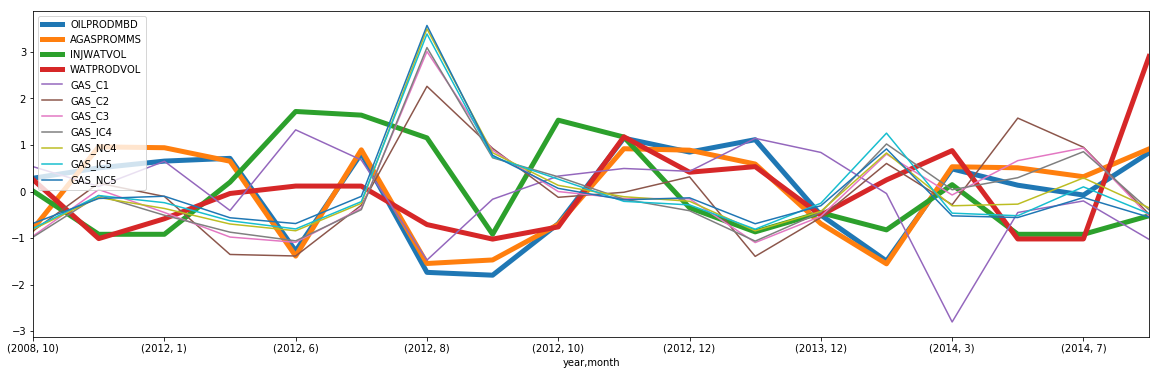

In [185]:
plt.figure(figsize=(20, 6))
cols = all_df[['OILPRODMBD', 'AGASPROMMS', 'INJWATVOL', 'WATPRODVOL'] + target_cols].columns

for tag in ['OILPRODMBD', 'AGASPROMMS', 'INJWATVOL', 'WATPRODVOL']:
    ((all_df.loc[(0.6201330545000001, 57.405076315)][tag] - \
      all_df.loc[(0.6201330545000001, 57.405076315)][tag].mean()) /\
     all_df.loc[(0.6201330545000001, 57.405076315)][tag].std()).plot(linewidth=5)
    
for tag in target_cols:
    ((all_df.loc[(0.6201330545000001, 57.405076315)][tag] - \
      all_df.loc[(0.6201330545000001, 57.405076315)][tag].mean()) /\
     all_df.loc[(0.6201330545000001, 57.405076315)][tag].std()).plot()
plt.legend(cols);
#all_df.loc[(0.6201330545000001, 57.405076315)]#.reset_index()

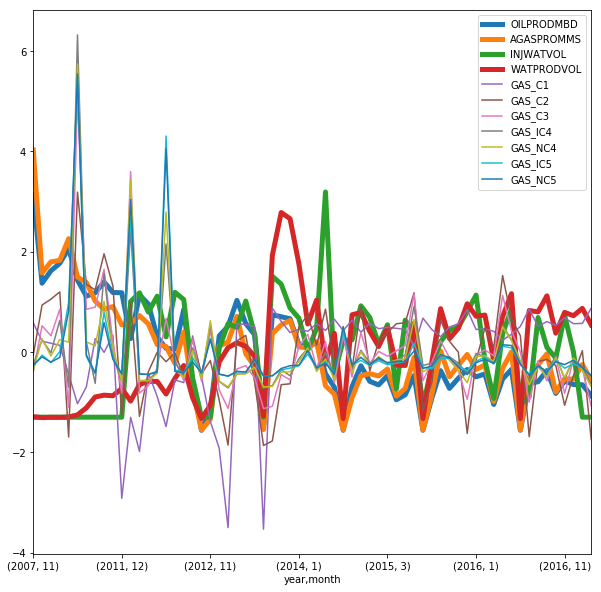

In [186]:
plt.figure(figsize=(10, 10))
cols = all_df[['OILPRODMBD', 'AGASPROMMS', 'INJWATVOL', 'WATPRODVOL'] + target_cols].columns
ind_tup = (2.1920561215000003, 56.7976982375)

for tag in ['OILPRODMBD', 'AGASPROMMS', 'INJWATVOL', 'WATPRODVOL']:
    ((all_df.loc[ind_tup][tag] - \
      all_df.loc[ind_tup][tag].mean()) /\
     all_df.loc[ind_tup][tag].std()).plot(linewidth=5)
    
for tag in target_cols:
    ((all_df.loc[ind_tup][tag] - \
      all_df.loc[ind_tup][tag].mean()) /\
     all_df.loc[ind_tup][tag].std()).plot()
plt.legend(cols);


In [187]:
ind_tup = (2.1920561215000003, 56.7976982375)
all_df.loc[ind_tup, cols].corr()

,OILPRODMBD,AGASPROMMS,INJWATVOL,WATPRODVOL,GAS_C1,GAS_C2,GAS_C3,GAS_IC4,GAS_NC4,GAS_IC5,GAS_NC5
OILPRODMBD,1.000000,0.958472,-0.110683,-0.179659,-0.171942,0.199327,0.176891,0.157760,0.177844,0.180881,0.169181
AGASPROMMS,0.958472,1.000000,-0.171722,-0.158186,-0.082982,0.237451,0.220829,0.192792,0.217125,0.212361,0.203720
INJWATVOL,-0.110683,-0.171722,1.000000,0.529768,0.117563,-0.113973,-0.124892,-0.131515,-0.131119,-0.109053,-0.095171
WATPRODVOL,-0.179659,-0.158186,0.529768,1.000000,0.412058,-0.218102,-0.281604,-0.267830,-0.302565,-0.283402,-0.274399
GAS_C1,-0.171942,-0.082982,0.117563,0.412058,1.000000,0.206994,-0.049756,-0.141172,-0.186766,-0.233809,-0.232033
GAS_C2,0.199327,0.237451,-0.113973,-0.218102,0.206994,1.000000,0.817588,0.632550,0.586909,0.415207,0.421851
GAS_C3,0.176891,0.220829,-0.124892,-0.281604,-0.049756,0.817588,1.000000,0.912525,0.908155,0.758888,0.776609
GAS_IC4,0.157760,0.192792,-0.131515,-0.267830,-0.141172,0.632550,0.912525,1.000000,0.969733,0.912971,0.917175
GAS_NC4,0.177844,0.217125,-0.131119,-0.302565,-0.186766,0.586909,0.908155,0.969733,1.000000,0.957156,0.965472
GAS_IC5,0.180881,0.212361,-0.109053,-0.283402,-0.233809,0.415207,0.758888,0.912971,0.957156,1.000000,0.996994


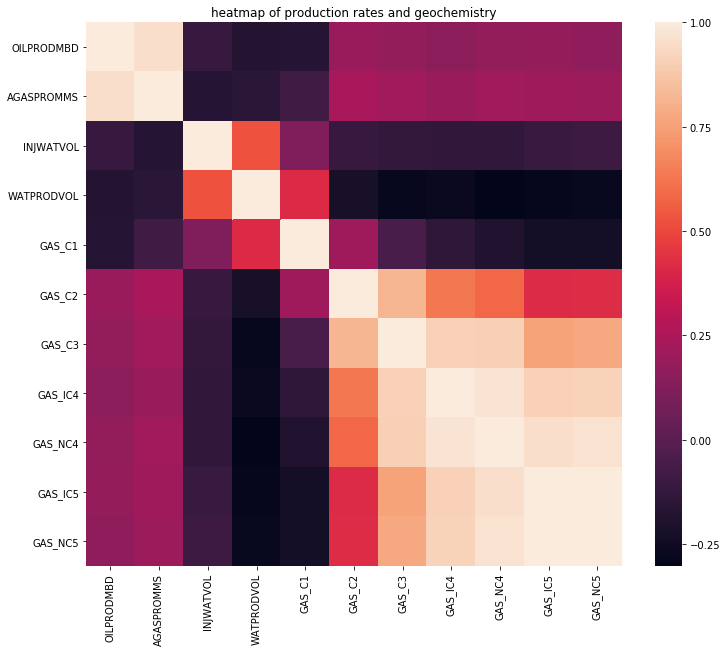

In [188]:
corr = all_df.loc[ind_tup, cols].corr()

# plot the heatmap
plt.figure(figsize=(12, 10))
plt.title('heatmap of production rates and geochemistry')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

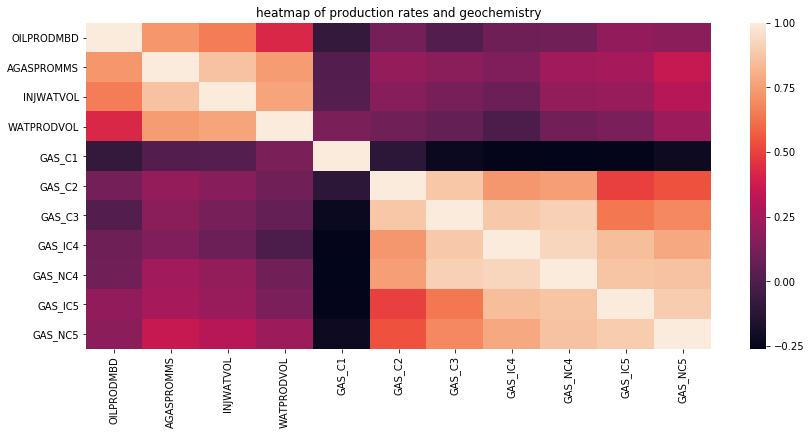

In [189]:
corr = all_df[cols].corr()

# plot the heatmap
plt.figure(figsize=(14, 6))
plt.title('heatmap of production rates and geochemistry')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

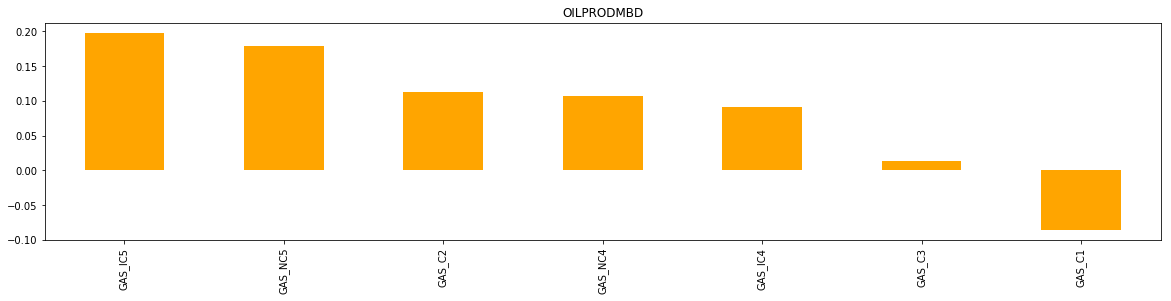

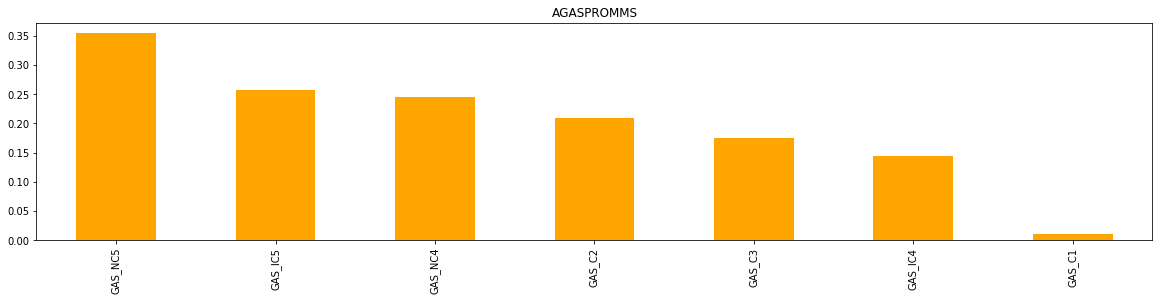

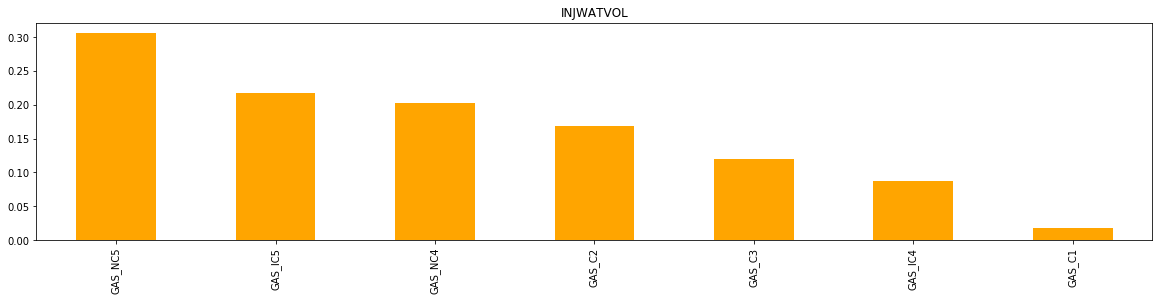

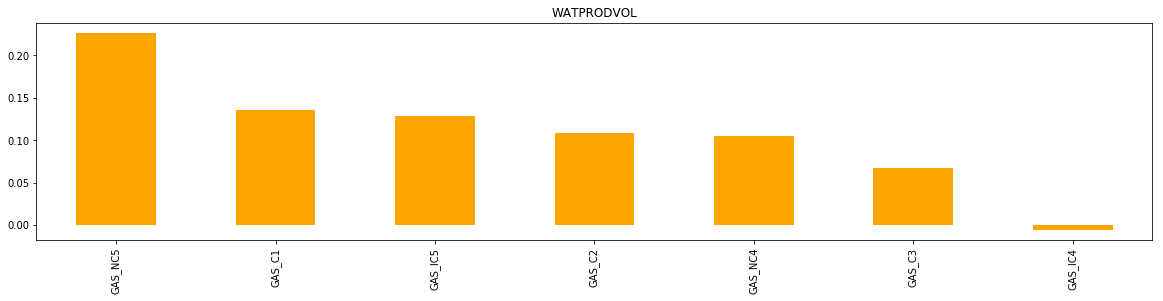

In [190]:
for tag in ['OILPRODMBD', 'AGASPROMMS', 'INJWATVOL', 'WATPRODVOL']:
    plt.figure(figsize=(20, 4))
    plt.title(tag)
    corr.loc[tag, target_cols][np.argsort(corr.loc[tag, target_cols])][::-1].plot(kind='bar', color='orange')